In [2]:
!pip install Jinja2

=== INITIAL DATA ASSESSMENT ===
Shape: (9822, 35)

Numeric columns (10): ['Age', 'Income', 'Clicks', 'Conversion Rate', 'CTR', 'Click_DayOfWeek', 'Click_Hour', 'Click_Month', 'High_CTR', 'High_Conversion']

Non-numeric columns (25): ['Age_AdType', 'Income_AdPlacement', 'Gender_Male', 'Gender_Other', 'Location_Suburban', 'Location_Urban', 'Ad Type_Native', 'Ad Type_Text', 'Ad Type_Video', 'Ad Topic_Finance', 'Ad Topic_Food', 'Ad Topic_Health', 'Ad Topic_Technology', 'Ad Topic_Travel', 'Ad Placement_Social Media', 'Ad Placement_Website', 'Age_Group_19-25', 'Age_Group_26-35', 'Age_Group_36-45', 'Age_Group_46-55', 'Age_Group_56-65', 'Age_Group_66+', 'Income_Group_Medium', 'Income_Group_High', 'Income_Group_Very High']


,dtype,missing_values,unique_values,is_numeric
Age,float64,0,73,True
Income,float64,0,9777,True
Clicks,float64,0,12,True
Conversion Rate,float64,0,3805,True
CTR,float64,0,961,True
Age_AdType,object,0,291,False
Income_AdPlacement,object,0,12,False
Click_DayOfWeek,int64,0,7,True
Click_Hour,int64,0,1,True
Click_Month,int64,0,12,True



Sample data:


,Age,Income,Clicks,Conversion Rate,CTR,Age_AdType,Income_AdPlacement,Click_DayOfWeek,Click_Hour,Click_Month,...,Ad Placement_Website,Age_Group_19-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Age_Group_66+,Income_Group_Medium,Income_Group_High,Income_Group_Very High
0,61.0,35717.43,3.0,0.0981,0.0737,61.0_Banner,Low_Social Media,3,20,1,...,False,False,False,False,False,True,False,False,False,False
1,41.0,47453.25,5.0,0.0937,0.0592,41.0_Video,Medium_Search Engine,0,20,4,...,False,False,False,True,False,False,False,True,False,False
2,49.0,68126.35,4.0,0.1912,0.0563,49.0_Text,Very High_Social Media,5,20,2,...,False,False,False,False,True,False,False,False,False,True



=== TARGET VARIABLE ANALYSIS ===


,Statistic,Value
0,Mean,0.201538
1,Median,0.180400
2,Std Dev,0.119043
3,Min,0.001000
4,Max,0.523837
5,Skewness,0.696236
6,Kurtosis,-0.106896


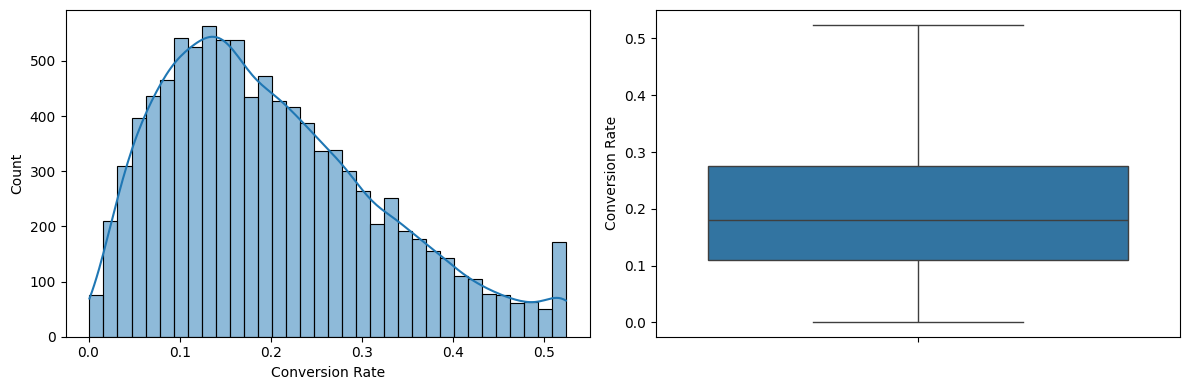


=== FEATURE CORRELATIONS ===


,Correlation
Conversion Rate,1.000000
High_Conversion,0.801547
Clicks,0.015916
Click_Month,0.013169
Income,0.007014
Age,-0.007524
High_CTR,-0.011545
CTR,-0.011546
Click_DayOfWeek,-0.018981
Click_Hour,NaN


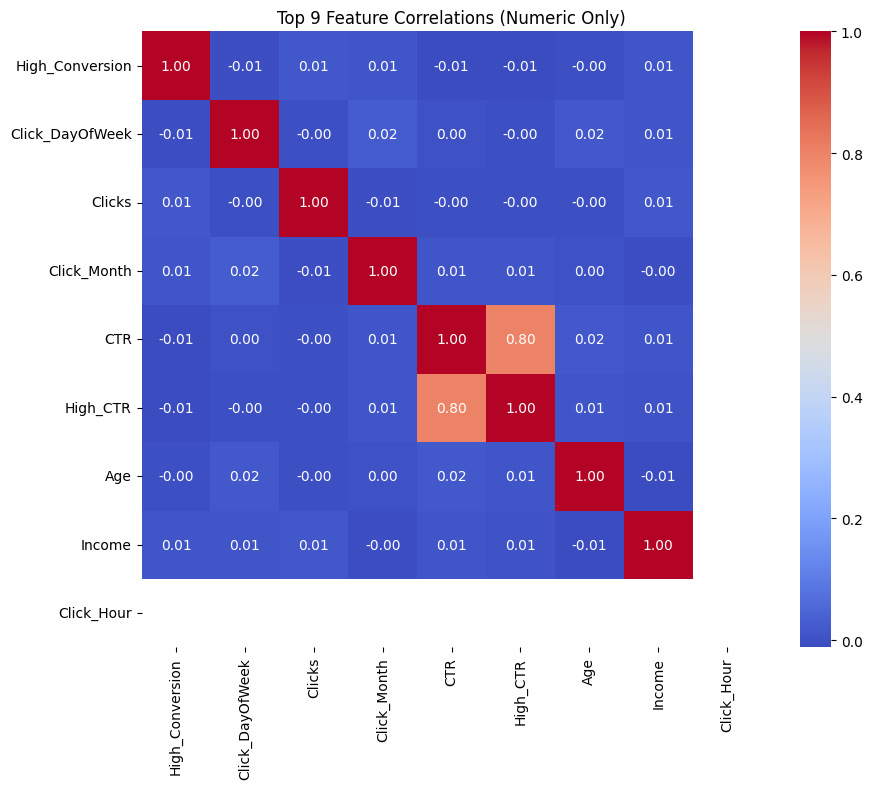

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Cleaned_Ad_Data.csv')

# 1. Initial Data Assessment
def initial_assessment(df):
    # Separate numeric and non-numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    non_numeric_cols = [col for col in df.columns if col not in numeric_cols]
    
    assessment = pd.DataFrame({
        'dtype': df.dtypes,
        'missing_values': df.isna().sum(),
        'unique_values': df.nunique(),
        'is_numeric': [col in numeric_cols for col in df.columns]
    })
    
    print("=== INITIAL DATA ASSESSMENT ===")
    print(f"Shape: {df.shape}")
    print(f"\nNumeric columns ({len(numeric_cols)}): {numeric_cols}")
    print(f"\nNon-numeric columns ({len(non_numeric_cols)}): {non_numeric_cols}")
    return assessment, numeric_cols

# Run assessment
initial_df, numeric_cols = initial_assessment(df)
display(initial_df)
print("\nSample data:")
display(df.head(3))

# 2. Target Analysis (using only numeric columns)
print("\n=== TARGET VARIABLE ANALYSIS ===")
if 'Conversion Rate' in numeric_cols:
    target_stats = pd.DataFrame({
        'Statistic': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness', 'Kurtosis'],
        'Value': [
            df['Conversion Rate'].mean(),
            df['Conversion Rate'].median(),
            df['Conversion Rate'].std(),
            df['Conversion Rate'].min(),
            df['Conversion Rate'].max(),
            df['Conversion Rate'].skew(),
            df['Conversion Rate'].kurt()
        ]
    })
    display(target_stats)

    # Visualization
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df['Conversion Rate'], kde=True, ax=ax[0])
    sns.boxplot(y=df['Conversion Rate'], ax=ax[1])
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'Conversion Rate' is not a numeric column")

# 3. Correlation Analysis (numeric columns only)
print("\n=== FEATURE CORRELATIONS ===")
if 'Conversion Rate' in numeric_cols:
    # Calculate correlations only for numeric columns
    numeric_df = df[numeric_cols]
    correlations = numeric_df.corr()['Conversion Rate'].sort_values(ascending=False)
    display(pd.DataFrame(correlations).rename(columns={'Conversion Rate': 'Correlation'}))

    # Plot top correlations
    top_n = min(15, len(numeric_cols)-1)  # Show top 15 or all if fewer
    top_features = correlations.abs().sort_values(ascending=False).index[1:top_n+1]  # Exclude self-correlation
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f'Top {top_n} Feature Correlations (Numeric Only)')
    plt.show()
else:
    print("Cannot calculate correlations - 'Conversion Rate' not numeric")

In [5]:
# Feature Engineering
print("\n=== FEATURE ENGINEERING ===")

# 1. Convert boolean columns to int (0/1)
bool_cols = [col for col in df.columns if df[col].dtype == bool]
df[bool_cols] = df[bool_cols].astype(int)

# 2. Process composite string columns
def split_composite_columns(df):
    # Age_AdType (e.g., '61.0_Banner')
    df['Age_from_AdType'] = df['Age_AdType'].str.split('_').str[0].astype(float)
    df['Ad_Type'] = df['Age_AdType'].str.split('_').str[1]
    
    # Income_AdPlacement (e.g., 'Low_Social Media')
    df['Income_Level'] = df['Income_AdPlacement'].str.split('_').str[0]
    df['Placement_Type'] = df['Income_AdPlacement'].str.split('_').str[1]
    
    return df.drop(['Age_AdType', 'Income_AdPlacement'], axis=1)

df = split_composite_columns(df)

# 3. One-hot encode categorical features
cat_cols = ['Ad_Type', 'Income_Level', 'Placement_Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Show engineered features
print("\nEngineered features:")
print(f"Total features after engineering: {len(df.columns)}")
print(f"New feature examples: {[col for col in df.columns if col not in initial_df.index][:5]}...")

# Show processed data
display(df.head(3))


=== FEATURE ENGINEERING ===

Engineered features:
Total features after engineering: 42
New feature examples: ['Age_from_AdType', 'Ad_Type_Native', 'Ad_Type_Text', 'Ad_Type_Video', 'Income_Level_Low']...


,Age,Income,Clicks,Conversion Rate,CTR,Click_DayOfWeek,Click_Hour,Click_Month,High_CTR,High_Conversion,...,Income_Group_Very High,Age_from_AdType,Ad_Type_Native,Ad_Type_Text,Ad_Type_Video,Income_Level_Low,Income_Level_Medium,Income_Level_Very High,Placement_Type_Social Media,Placement_Type_Website
0,61.0,35717.43,3.0,0.0981,0.0737,3,20,1,1,0,...,0,61.0,False,False,False,True,False,False,True,False
1,41.0,47453.25,5.0,0.0937,0.0592,0,20,4,1,0,...,0,41.0,False,False,True,False,True,False,False,False
2,49.0,68126.35,4.0,0.1912,0.0563,5,20,2,1,1,...,1,49.0,False,True,False,False,False,True,True,False



=== MODEL PERFORMANCE ===


,Model,RMSE,R-squared
0,Linear Regression,0.0721,0.6436
1,Random Forest,0.0739,0.6256



Top 10 Important Features:


,Feature,Importance
8,High_Conversion,0.6411
1,Income,0.0682
3,CTR,0.0646
6,Click_Month,0.0309
2,Clicks,0.0290
32,Age_from_AdType,0.0240
0,Age,0.0237
4,Click_DayOfWeek,0.0205
9,Gender_Male,0.0071
12,Location_Urban,0.0063


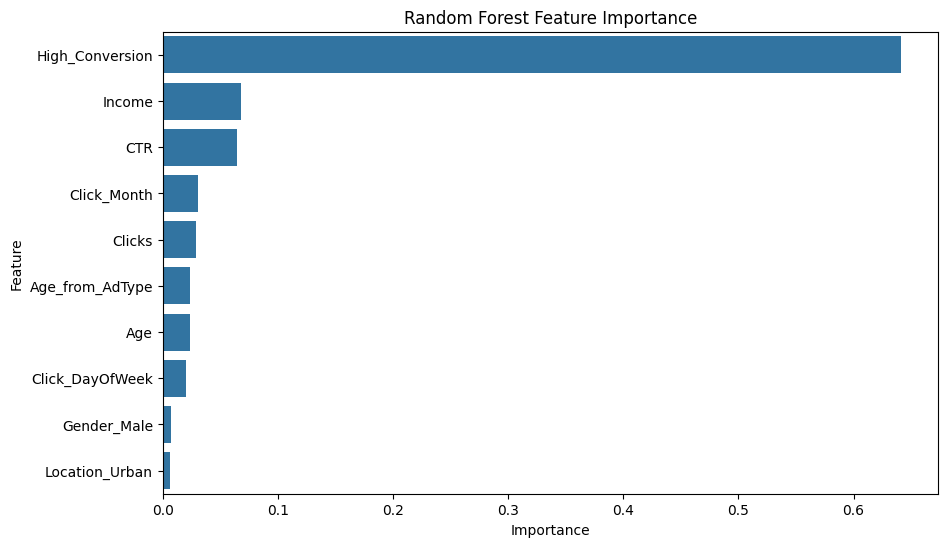

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data - ensure we only use numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
X = df[numeric_cols].drop('Conversion Rate', axis=1)
y = df['Conversion Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE (fixed version)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R-squared': r2_score(y_test, y_pred)
    })

# Display results
results_df = pd.DataFrame(results)
print("\n=== MODEL PERFORMANCE ===")
display(results_df.style.format({
    'RMSE': '{:.4f}',
    'R-squared': '{:.4f}'
}))

# Feature Importance for Random Forest
if "Random Forest" in models:
    importances = models["Random Forest"].feature_importances_
    feat_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False).head(10)
    
    print("\nTop 10 Important Features:")
    display(feat_imp.style.format({'Importance': '{:.4f}'}))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp)
    plt.title('Random Forest Feature Importance')
    plt.show()

In [8]:
# Check if High_Conversion is derived from Conversion Rate
threshold = df['Conversion Rate'].median()  # Common threshold
calculated_high_conv = (df['Conversion Rate'] > threshold).astype(int)

if (df['High_Conversion'] == calculated_high_conv).all():
    print("Warning: High_Conversion appears to be directly derived from Conversion Rate")
else:
    print("High_Conversion may be a legitimate feature")

In [10]:
from xgboost import XGBRegressor

In [11]:
# Remove the leaky feature and re-prepare data
X_clean = X.drop('High_Conversion', axis=1)

# Train-test split
X_train_clean, X_test_clean, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_test_clean_scaled = scaler.transform(X_test_clean)

# Initialize models
clean_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate
clean_results = []
for name, model in clean_models.items():
    model.fit(X_train_clean_scaled, y_train)
    y_pred = model.predict(X_test_clean_scaled)
    
    clean_results.append({
        'Model': name,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R-squared': r2_score(y_test, y_pred)
    })

# Display clean results
clean_results_df = pd.DataFrame(clean_results)
print("\n=== MODEL PERFORMANCE (NO LEAK) ===")
display(clean_results_df.style.format({
    'RMSE': '{:.4f}',
    'R-squared': '{:.4f}'
}))


=== MODEL PERFORMANCE (NO LEAK) ===


,Model,RMSE,R-squared
0,Linear Regression,0.1212,-0.0067
1,Random Forest,0.1229,-0.0366
2,XGBoost,0.1310,-0.1762
